In [25]:
import numpy as np
from log_hazard_rx_binary import grx_dnn_bin
from log_hazard_rx_binary import grax_dnn_bin
import numpy.random as ndm
import matplotlib.pyplot as plt
from seed import set_seed
from data_generator import gendata_Linear
from data_generator import gendata_Deep
from data_generator import gendata_Deep_mixG

In [26]:
beta = np.array([0,-0.5,0.5,-0.25,0.5])
gamma = np.array([0.5,-0.25,0,0.5,-0.25])
patiences = 10
n_node = 50
n_layer = 1
t_nodes = 100
t_fig = 50
n_lr = 1.2e-3
n_epoch = 1000
s_k = 0.1*np.arange(100)
set_seed(114)
test_data = gendata_Linear(500, 0.5,beta,gamma,pat=3)

set_seed(1919)
val_data = gendata_Linear(100, 0.5,beta,gamma,pat=3)
train_data = gendata_Linear(400, 0.5,beta,gamma,pat=3)

In [27]:
Srx1 = grx_dnn_bin(train_data, val_data, test_data, t_nodes, t_fig, s_k, n_layer, n_node, n_lr, n_epoch, patiences)
S_R_X1 = Srx1['S_R_X']
Lam_R_X1 = Srx1['Lambda_R_X']
print(S_R_X1.shape)
print(Lam_R_X1.shape)

DNN_iteration
epoch= 0 val_loss= 0.7590094
epoch= 1 val_loss= 0.75327826
epoch= 2 val_loss= 0.7478449
epoch= 3 val_loss= 0.74269295
epoch= 4 val_loss= 0.7377428
epoch= 5 val_loss= 0.73298025
epoch= 6 val_loss= 0.7283873
epoch= 7 val_loss= 0.72389954
epoch= 8 val_loss= 0.7194792
epoch= 9 val_loss= 0.7151876
epoch= 10 val_loss= 0.71092397
epoch= 11 val_loss= 0.7066652
epoch= 12 val_loss= 0.7024316
epoch= 13 val_loss= 0.69821215
epoch= 14 val_loss= 0.69403195
epoch= 15 val_loss= 0.68979347
epoch= 16 val_loss= 0.68547815
epoch= 17 val_loss= 0.6811243
epoch= 18 val_loss= 0.6766224
epoch= 19 val_loss= 0.6720061
epoch= 20 val_loss= 0.6672007
epoch= 21 val_loss= 0.6622374
epoch= 22 val_loss= 0.6571296
epoch= 23 val_loss= 0.6518178
epoch= 24 val_loss= 0.6463268
epoch= 25 val_loss= 0.64064354
epoch= 26 val_loss= 0.63477397
epoch= 27 val_loss= 0.62870795
epoch= 28 val_loss= 0.6223548
epoch= 29 val_loss= 0.6157603
epoch= 30 val_loss= 0.6090041
epoch= 31 val_loss= 0.6021432
epoch= 32 val_loss= 0.59

In [28]:
set_seed(1194)
val_data = gendata_Linear(100, 0.5,beta,gamma,pat=3)
train_data = gendata_Linear(400, 0.5,beta,gamma,pat=3)
Srax1 = grax_dnn_bin(train_data, val_data, test_data, t_nodes, t_fig, s_k, n_layer, n_node, n_lr, n_epoch, patiences)
S_R_A_X1 = Srax1['S_R_X']
Lam_R_A_X1 = Srax1['Lambda_R_X']
print(S_R_A_X1.shape)
print(Lam_R_A_X1.shape)

DNN_iteration
epoch= 0 val_loss= 0.900732
epoch= 1 val_loss= 0.89460695
epoch= 2 val_loss= 0.88866067
epoch= 3 val_loss= 0.88300127
epoch= 4 val_loss= 0.8774019
epoch= 5 val_loss= 0.8718994
epoch= 6 val_loss= 0.8663916
epoch= 7 val_loss= 0.86106443
epoch= 8 val_loss= 0.8557882
epoch= 9 val_loss= 0.85060036
epoch= 10 val_loss= 0.84547347
epoch= 11 val_loss= 0.84039134
epoch= 12 val_loss= 0.83529574
epoch= 13 val_loss= 0.83022684
epoch= 14 val_loss= 0.8251918
epoch= 15 val_loss= 0.82012475
epoch= 16 val_loss= 0.8149423
epoch= 17 val_loss= 0.8096461
epoch= 18 val_loss= 0.80425394
epoch= 19 val_loss= 0.7988275
epoch= 20 val_loss= 0.79338336
epoch= 21 val_loss= 0.7880262
epoch= 22 val_loss= 0.78255916
epoch= 23 val_loss= 0.7770544
epoch= 24 val_loss= 0.7714305
epoch= 25 val_loss= 0.7656277
epoch= 26 val_loss= 0.75958174
epoch= 27 val_loss= 0.75328225
epoch= 28 val_loss= 0.74667543
epoch= 29 val_loss= 0.73982084
epoch= 30 val_loss= 0.7327515
epoch= 31 val_loss= 0.72543174
epoch= 32 val_loss=

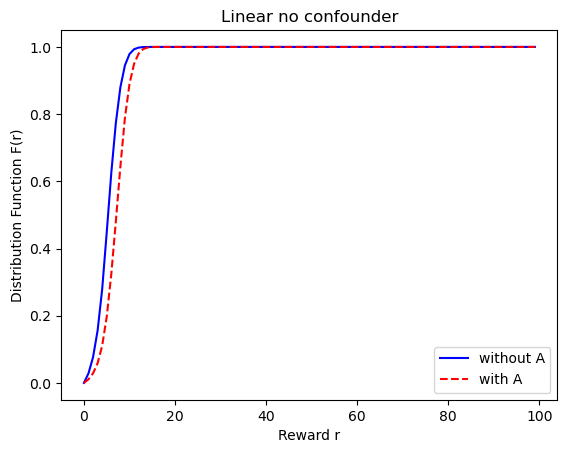

In [29]:
fd=123
S_R_X_train1 = Srx1['S_R_X_train']
S_R_A_X_train1 = Srax1['S_R_X_train']
plt.plot((1-S_R_X_train1[fd,:]),label = 'without A', color = 'blue', linestyle='-')
plt.plot((1-S_R_A_X_train1[fd,:]),label = 'with A', color = 'red', linestyle='--')
plt.xlabel('Reward r')
plt.ylabel('Distribution Function F(r)')
plt.title('Linear no confounder')
plt.legend()

0.28478584
1.6983609


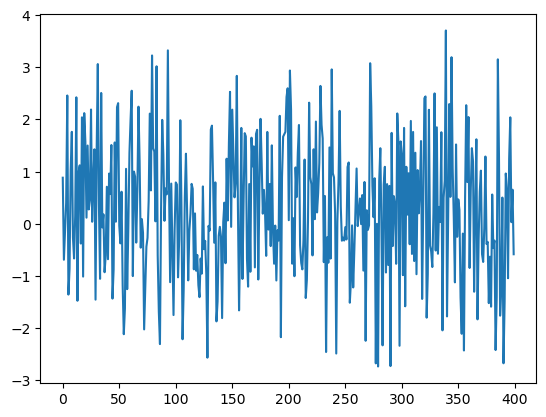

In [30]:
print(np.mean(np.log(Lam_R_A_X1)-np.log(Lam_R_X1)))
print((np.log(Lam_R_A_X1)-np.log(Lam_R_X1)).var())
plt.plot(np.log(Lam_R_A_X1)-np.log(Lam_R_X1))
plt.show()

In [31]:
import scipy.stats as stats
stats.shapiro(np.log(Lam_R_A_X1)-np.log(Lam_R_X1))

ShapiroResult(statistic=np.float64(0.994729241600427), pvalue=np.float64(0.18786354742608197))

test statistic: linear no confounder

In [32]:
print(np.sqrt(400)*(S_R_A_X1*(1-S_R_A_X1)*(np.log(Lam_R_A_X1)-np.log(Lam_R_X1))).mean())
print(np.sqrt(400)*(S_R_A_X1*(np.log(Lam_R_A_X1)-np.log(Lam_R_X1))).mean())
log_dif1 = np.log(Lam_R_A_X1)-np.log(Lam_R_X1)
# print((np.sqrt(400)*(log_dif1-log_dif1.mean())/np.sqrt(log_dif1.var())).mean())

0.9692788869142532
-1.3192731142044067


In [33]:
patiences = 10
n_node = 50
n_layer = 1
t_nodes = 100
t_fig = 50
n_lr = 1.2e-3
n_epoch = 1000
s_k = 0.1*np.arange(100)
set_seed(114)
test_data = gendata_Deep(500, 0.5,pat=3)

set_seed(1919)
val_data = gendata_Deep(100, 0.5,pat=3)
train_data = gendata_Deep(400, 0.5,pat=3)
Srx2 = grx_dnn_bin(train_data, val_data, test_data, t_nodes, t_fig, s_k, n_layer, n_node, n_lr, n_epoch, patiences)
S_R_X2 = Srx2['S_R_X']
Lam_R_X2 = Srx2['Lambda_R_X']

DNN_iteration
epoch= 0 val_loss= 0.5393104
epoch= 1 val_loss= 0.5294934
epoch= 2 val_loss= 0.52018887
epoch= 3 val_loss= 0.5113408
epoch= 4 val_loss= 0.5028912
epoch= 5 val_loss= 0.49469203
epoch= 6 val_loss= 0.4868009
epoch= 7 val_loss= 0.47918677
epoch= 8 val_loss= 0.47186843
epoch= 9 val_loss= 0.46476075
epoch= 10 val_loss= 0.4579022
epoch= 11 val_loss= 0.4512972
epoch= 12 val_loss= 0.44495866
epoch= 13 val_loss= 0.4388668
epoch= 14 val_loss= 0.43292677
epoch= 15 val_loss= 0.42719954
epoch= 16 val_loss= 0.42169398
epoch= 17 val_loss= 0.41637412
epoch= 18 val_loss= 0.41123244
epoch= 19 val_loss= 0.40635583
epoch= 20 val_loss= 0.40167466
epoch= 21 val_loss= 0.3971406
epoch= 22 val_loss= 0.3928228
epoch= 23 val_loss= 0.38862836
epoch= 24 val_loss= 0.3845118
epoch= 25 val_loss= 0.38050675
epoch= 26 val_loss= 0.37654182
epoch= 27 val_loss= 0.37263858
epoch= 28 val_loss= 0.3688424
epoch= 29 val_loss= 0.36514026
epoch= 30 val_loss= 0.3615565
epoch= 31 val_loss= 0.3580883
epoch= 32 val_loss

In [34]:
set_seed(1194)
val_data = gendata_Deep(100, 0.5,pat=3)
train_data = gendata_Deep(400, 0.5,pat=3)
Srax2 = grax_dnn_bin(train_data, val_data, test_data, t_nodes, t_fig, s_k, n_layer, n_node, n_lr, n_epoch, patiences)
S_R_A_X2 = Srax2['S_R_X']
Lam_R_A_X2 = Srax2['Lambda_R_X']

DNN_iteration
epoch= 0 val_loss= 0.64127576
epoch= 1 val_loss= 0.63108426
epoch= 2 val_loss= 0.62102294
epoch= 3 val_loss= 0.6110695
epoch= 4 val_loss= 0.60126746
epoch= 5 val_loss= 0.59148973
epoch= 6 val_loss= 0.5818266
epoch= 7 val_loss= 0.5722331
epoch= 8 val_loss= 0.56261826
epoch= 9 val_loss= 0.5529972
epoch= 10 val_loss= 0.54336154
epoch= 11 val_loss= 0.5337012
epoch= 12 val_loss= 0.5240794
epoch= 13 val_loss= 0.51442176
epoch= 14 val_loss= 0.50471514
epoch= 15 val_loss= 0.49503812
epoch= 16 val_loss= 0.4855119
epoch= 17 val_loss= 0.47605214
epoch= 18 val_loss= 0.46680588
epoch= 19 val_loss= 0.45790327
epoch= 20 val_loss= 0.4494387
epoch= 21 val_loss= 0.44157806
epoch= 22 val_loss= 0.4343638
epoch= 23 val_loss= 0.427857
epoch= 24 val_loss= 0.42218018
epoch= 25 val_loss= 0.41745272
epoch= 26 val_loss= 0.41371977
epoch= 27 val_loss= 0.41091406
epoch= 28 val_loss= 0.40908116
epoch= 29 val_loss= 0.4080726
epoch= 30 val_loss= 0.40774578
epoch= 31 val_loss= 0.40781888
patience_counter

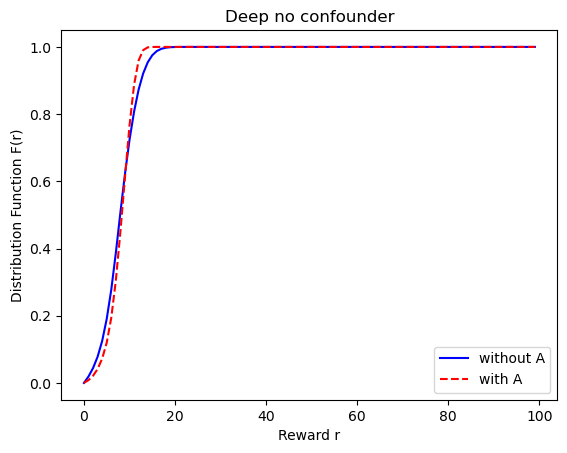

In [35]:
fd = 123
S_R_X_train2 = Srx2['S_R_X_train']
S_R_A_X_train2 = Srax2['S_R_X_train']
plt.plot((1-S_R_X_train2[fd,:]),label = 'without A', color = 'blue', linestyle='-')
plt.plot((1-S_R_A_X_train2[fd,:]),label = 'with A', color = 'red', linestyle='--')
plt.xlabel('Reward r')
plt.ylabel('Distribution Function F(r)')
plt.title('Deep no confounder')
plt.legend()

0.3091272
1.0626996


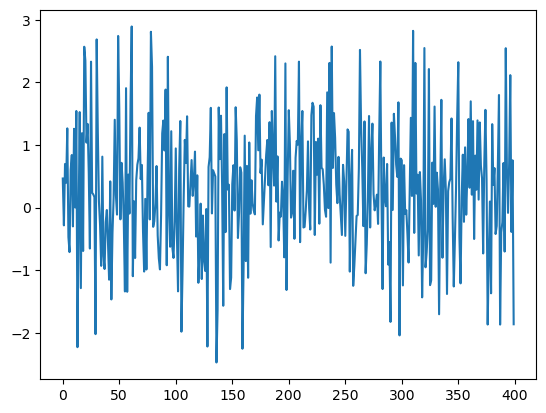

In [36]:
print(np.mean(np.log(Lam_R_A_X2)-np.log(Lam_R_X2)))
print((np.log(Lam_R_A_X2)-np.log(Lam_R_X2)).var())
plt.plot(np.log(Lam_R_A_X2)-np.log(Lam_R_X2))
plt.show()

In [37]:
import scipy.stats as stats
stats.shapiro(np.log(Lam_R_A_X2)-np.log(Lam_R_X2))

ShapiroResult(statistic=np.float64(0.995237293194609), pvalue=np.float64(0.2595869879385492))

test statistics: deep without confounder

In [38]:
print(np.sqrt(400)*(S_R_A_X2*(1-S_R_A_X2)*(np.log(Lam_R_A_X2)-np.log(Lam_R_X2))).mean())
print(np.sqrt(400)*(S_R_A_X2*(np.log(Lam_R_A_X2)-np.log(Lam_R_X2))).mean())
log_dif2 = np.log(Lam_R_A_X2)-np.log(Lam_R_X2)
# print((np.sqrt(400)*(log_dif2-log_dif2.mean())/np.sqrt(log_dif2.var())).mean())

0.814773291349411
-0.5481534078717232


In [39]:
import numpy as np
from log_hazard_rx_binary import grx_dnn_bin
from log_hazard_rx_binary import grax_dnn_bin
import numpy.random as ndm
import matplotlib.pyplot as plt
from seed import set_seed
from data_generator import gendata_Linear
from data_generator import gendata_Deep
from data_generator import gendata_Deep_mixG

In [40]:
patiences = 20
n_node = 64
n_layer = 2
t_nodes = 100
t_fig = 50
n_lr = 5e-4
n_epoch = 1000
s_k = 0.1*np.arange(100)
set_seed(114)
test_data = gendata_Deep_mixG(500, 0.5,pat=3)

set_seed(1145)
val_data = gendata_Deep_mixG(100, 0.5,pat=3)
train_data = gendata_Deep_mixG(400, 0.5,pat=3)
Srx3 = grx_dnn_bin(train_data, val_data, test_data, t_nodes, t_fig, s_k, n_layer, n_node, n_lr, n_epoch, patiences)
S_R_X3 = Srx3['S_R_X']
Lam_R_X3 = Srx3['Lambda_R_X']

DNN_iteration
epoch= 0 val_loss= 1.1960717
epoch= 1 val_loss= 1.1911087
epoch= 2 val_loss= 1.1866611
epoch= 3 val_loss= 1.1827283
epoch= 4 val_loss= 1.1791729
epoch= 5 val_loss= 1.1758196
epoch= 6 val_loss= 1.1727315
epoch= 7 val_loss= 1.1698769
epoch= 8 val_loss= 1.1672901
epoch= 9 val_loss= 1.1649305
epoch= 10 val_loss= 1.1628329
epoch= 11 val_loss= 1.1609855
epoch= 12 val_loss= 1.1593678
epoch= 13 val_loss= 1.1579267
epoch= 14 val_loss= 1.1566898
epoch= 15 val_loss= 1.1556948
epoch= 16 val_loss= 1.1549196
epoch= 17 val_loss= 1.1543244
epoch= 18 val_loss= 1.1539663
epoch= 19 val_loss= 1.1538591
epoch= 20 val_loss= 1.1539704
patience_counter = 1
epoch= 21 val_loss= 1.1542586
patience_counter = 2
epoch= 22 val_loss= 1.1547699
patience_counter = 3
epoch= 23 val_loss= 1.1554799
patience_counter = 4
epoch= 24 val_loss= 1.1564063
patience_counter = 5
epoch= 25 val_loss= 1.157487
patience_counter = 6
epoch= 26 val_loss= 1.158648
patience_counter = 7
epoch= 27 val_loss= 1.1598643
patience_co

In [41]:
set_seed(1194)
patiences = 20
n_node = 64
n_layer = 2
t_nodes = 100
t_fig = 50
n_lr = 5e-4
n_epoch = 1000
s_k = 0.1*np.arange(100)
val_data = gendata_Deep_mixG(100, 0.5,pat=3)
train_data = gendata_Deep_mixG(400, 0.5,pat=3)
Srax3 = grax_dnn_bin(train_data, val_data, test_data, t_nodes, t_fig, s_k, n_layer, n_node, n_lr, n_epoch, patiences)
S_R_A_X3 = Srax3['S_R_X']
Lam_R_A_X3 = Srax3['Lambda_R_X']

DNN_iteration
epoch= 0 val_loss= 1.336434
epoch= 1 val_loss= 1.3252603
epoch= 2 val_loss= 1.3143437
epoch= 3 val_loss= 1.3036828
epoch= 4 val_loss= 1.2932029
epoch= 5 val_loss= 1.2828528
epoch= 6 val_loss= 1.2727755
epoch= 7 val_loss= 1.2629613
epoch= 8 val_loss= 1.253327
epoch= 9 val_loss= 1.2438531
epoch= 10 val_loss= 1.2346398
epoch= 11 val_loss= 1.2255714
epoch= 12 val_loss= 1.2165874
epoch= 13 val_loss= 1.207767
epoch= 14 val_loss= 1.1990398
epoch= 15 val_loss= 1.190458
epoch= 16 val_loss= 1.1820762
epoch= 17 val_loss= 1.173842
epoch= 18 val_loss= 1.1658113
epoch= 19 val_loss= 1.1580337
epoch= 20 val_loss= 1.1504756
epoch= 21 val_loss= 1.1430976
epoch= 22 val_loss= 1.1359229
epoch= 23 val_loss= 1.128957
epoch= 24 val_loss= 1.1222649
epoch= 25 val_loss= 1.1158321
epoch= 26 val_loss= 1.1096663
epoch= 27 val_loss= 1.103805
epoch= 28 val_loss= 1.0981919
epoch= 29 val_loss= 1.0927633
epoch= 30 val_loss= 1.0875914
epoch= 31 val_loss= 1.0826436
epoch= 32 val_loss= 1.0779138
epoch= 33 val

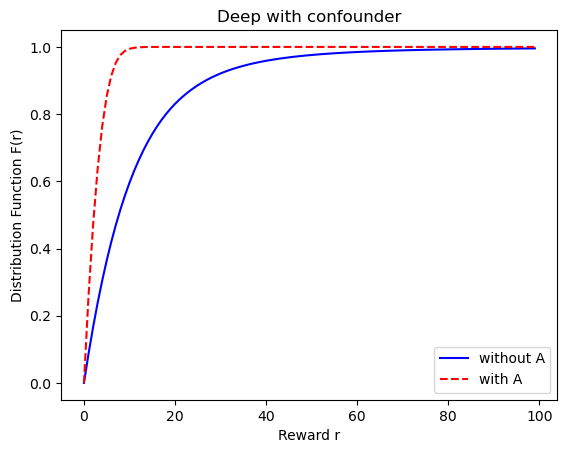

In [42]:
fd = 123
S_R_X_train3 = Srx3['S_R_X_train']
S_R_A_X_train3 = Srax3['S_R_X_train']
plt.plot((1-S_R_X_train3[fd,:]),label = 'without A', color = 'blue', linestyle='-')
plt.plot((1-S_R_A_X_train3[fd,:]),label = 'with A', color = 'red', linestyle='--')
plt.xlabel('Reward r')
plt.ylabel('Distribution Function F(r)')
plt.title('Deep with confounder')
plt.legend()

0.7468634
1.0435692


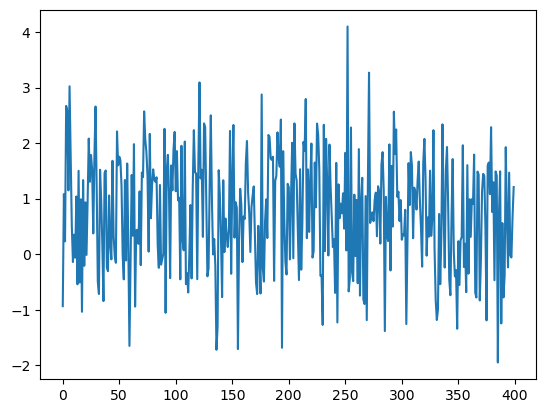

In [43]:
print((np.log(Lam_R_A_X3)-np.log(Lam_R_X3)).mean())
print((np.log(Lam_R_A_X3)-np.log(Lam_R_X3)).var())
plt.plot(np.log(Lam_R_A_X3)-np.log(Lam_R_X3))
plt.show()

In [44]:
import scipy.stats as stats
stats.shapiro(np.log(Lam_R_A_X3)-np.log(Lam_R_X3))

ShapiroResult(statistic=np.float64(0.9913510992989258), pvalue=np.float64(0.019497348155695458))

test statistics: deep with confounder

In [45]:
print(np.sqrt(400)*(S_R_A_X3*(1-S_R_A_X3)*(np.log(Lam_R_A_X3)-np.log(Lam_R_X3))).mean())
print(np.sqrt(400)*(S_R_A_X3*(np.log(Lam_R_A_X3)-np.log(Lam_R_X3))).mean())


2.6772066950798035
5.0692421197891235


In [46]:
log_dif3 = np.log(Lam_R_A_X3)-np.log(Lam_R_X3)
# print((np.sqrt(400)*(log_dif3-log_dif3.mean())/np.sqrt(log_dif3.var())).mean())

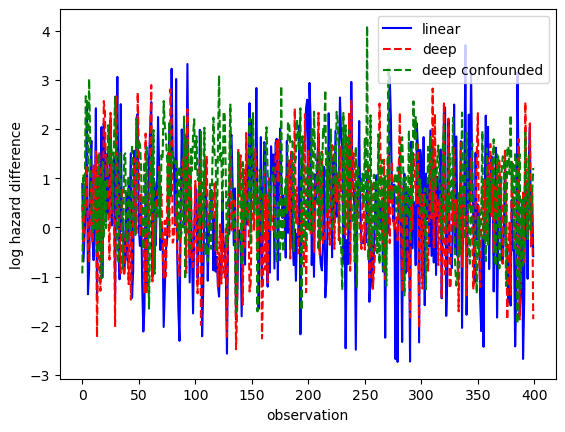

In [47]:
plt.plot((log_dif1),label = 'linear', color = 'blue', linestyle='-')
plt.plot((log_dif2),label = 'deep', color = 'red', linestyle='--')
plt.plot((log_dif3),label = 'deep confounded', color = 'green', linestyle='--')
plt.xlabel('observation')
plt.ylabel('log hazard difference')
plt.legend()

In [48]:
from sklearn.model_selection import train_test_split
X1, X2, R1, R2, A1, A2 = train_test_split(train_data['X'],train_data['R'], train_data['A'], test_size=0.5, random_state=42)
# print(X1)
# print(A1)

In [49]:
X1, X2, R1, R2, A1, A2 = train_test_split(train_data['X'],\
                                            train_data['R'], train_data['A'], \
                                            test_size=0.5, random_state=42) 
train_data1 = {'X':X1, 'A':A1, 'R':R1}
train_data2 = {'X':X2, 'A':A2, 'R':R2}
print(len(R1))

200
